## Making a Request to the ESPN Fantasy API

In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
swid = '{FEDFD550-8D47-4C16-A6AC-028D402FA873}'
espn_s2 = 'AEAYvjo76e3PfNkb0gHcEuispXq4I0eV3cx7PPprc38ct28AkZf3i0%2FwWGZWyjMxXgk7mYizgN9oqeerqvjtT6pl6qEpp5GJQjNIBOXd%2F4q186B406uxTesz10Xk56u9BGRzZIH1N48f2QmKSU49Fg8k%2BAI9A8WLUok9CLILSPuh5LRjjqoa7MbSOUZNs9xqlWFXuRsy0zo51fy44sY92Ri91Ey7YStwDfPoRbNuoP0KvXUkcCymfIvboGGlMr3QfY2WLpNFBuBIgI6j2tvCKZehS7e2sdkiVQonjLKtqWTqqw%3D%3D'

In [4]:
league_id = '656635509'
season = '2023'
week = 1

In [5]:
url = 'https://lm-api-reads.fantasy.espn.com/apis/v3/games/ffl/seasons/{}/segments/0/leagues/{}?view=mMatchup&view=mMatchupScore'.format(season, league_id)

In [7]:
r = requests.get(url,
                     params={'scoreingPeriodId':week},
                     cookies={"SWID": swid, "espn_s2": espn_s2})
espn_raw_data = r.json()

In [8]:
espn_raw_data

{'draftDetail': {'drafted': True, 'inProgress': False},
 'gameId': 1,
 'id': 656635509,
 'schedule': [{'away': {'adjustment': 0.0,
    'cumulativeScore': {'losses': 0,
     'scoreByStat': {'128': {'ineligible': False,
       'rank': 0.0,
       'result': None,
       'score': 0.0},
      '129': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '130': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 1.0},
      '3': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 241.0},
      '4': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 2.0},
      '132': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '133': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '134': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '198': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '135': {'ineligible': False, 'rank': 0.0, 'result': None, 'score': 0.0},
      '7

## Saving the JSON Response to a Pandas Dataframe

### Accessing Nested JSON Data 

In [12]:
columns = [
        'Team',
        'Player',
        'Slot',
        'Projected',
        'Actual']

In [14]:
 # get a single team
team = espn_raw_data['teams'][0]
team_id = team['id']

In [15]:
team_abbrev = {
    1: 'BRAD',
    2: 'SAi',
    3: 'DAP',
    4: 'DAM',
    5: 'KUBs',
    6: 'JSOs',
    7: 'TST',
    8: 'DOOM',
}

In [16]:
team_owner = team_abbrev[team_id]
print(team_owner)

BRAD


In [17]:
#loop over every player on the teams roster
for player in team['roster']['entries']:
    print(player['playerPoolEntry']['player']['fullName'])
    print(player['lineupSlotId'])

Justin Jefferson
4
CeeDee Lamb
4
Travis Etienne Jr.
2
DeAndre Hopkins
23
James Cook
2
Drake London
20
Brian Robinson Jr.
20
Isiah Pacheco
20
Jordan Addison
20
Brock Purdy
0
Sam Howell
20
Kenneth Walker III
20
Brandon Aubrey
17
Jake Ferguson
6
Ezekiel Elliott
20
Bills D/ST
16


In [25]:
eligible_positions = {
    0 : 'QB', 
    2 : 'RB', 
    4 : 'WR',
    6 : 'TE', 
    7 : 'OP',
    16: 'D/ST', 
    17: 'K',
    20: 'Bench',
    21: 'IR',
    23: 'Flex'
}

In [19]:
for player in team['roster']['entries']:
    print(player['playerPoolEntry']['player']['fullName'])
    print(player['lineupSlotId'])
    lineup_slot = player['lineupSlotId']
    print(eligible_positions[lineup_slot])

Justin Jefferson
4
WR
CeeDee Lamb
4
WR
Travis Etienne Jr.
2
RB
DeAndre Hopkins
23
Flex
James Cook
2
RB
Drake London
20
Bench
Brian Robinson Jr.
20
Bench
Isiah Pacheco
20
Bench
Jordan Addison
20
Bench
Brock Purdy
0
QB
Sam Howell
20
Bench
Kenneth Walker III
20
Bench
Brandon Aubrey
17
K
Jake Ferguson
6
TE
Ezekiel Elliott
20
Bench
Bills D/ST
16
D/ST


### Projected and Actual Points

In [20]:
# calculate for a single player
team = espn_raw_data['teams'][0]
player = team['roster']['entries'][0]
player_name = player['playerPoolEntry']['player']['fullName']

In [21]:
for stats in player['playerPoolEntry']['player']['stats']:
    #skip rows where the scoring period does not match with current week
    if stats['scoringPeriodId'] != week:
        continue
    # if the souce id = 0, these are actual stats
    if stats['statSourceId'] == 0:
        actual = stats['appliedTotal']
    # if the source id = 1, these are projected stats
    elif stats['statSourceId'] == 1:
        projected = stats['appliedTotal']

In [23]:
team = espn_raw_data['teams'][0]
for player in team['roster']['entries']:
    player_name = player['playerPoolEntry']['player']['fullName']
    # get the projected and actual points
    projected = None, 
    actual = None
    
    # loop over the stats for each player
    for stats in player['playerPoolEntry']['player']['stats']:
        # skip the rows where the scoring period does not match up with the curren week
        if stats['scoringPeriodId'] != week:
            continue
        # if the source id = 0 then these are actual stats
        if stats['statSourceId'] == 0:
            actual = stats['appliedTotal']
        # if the source id = 1 then these are projected stats
        elif stats['statSourceId'] == 1:
            projected = stats['appliedTotal']

In [26]:
# create an empty list to append data to
projection_data = []

for week in range(1, 18):
    print('Week', week)
    
    # get the raw data
    r = requests.get(url,
                    params={'scoringPeriodId': week},
                    cookies={"SWID": swid, "espn_s2": espn_s2})
    espn_raw_data = r.json()
    
    # loop over each team in the request
    for team in espn_raw_data['teams']:
        # get the team_id to map to team names
        team_id = team['id']
        # create a new column with the team_abbrev using the team_id as the key
        team_owner = team_abbrev[team_id]
        # loop over every player on the teams roster
        for player in team['roster']['entries']:
            player_name = player['playerPoolEntry']['player']['fullName']
            lineup_slot = player['lineupSlotId']
            # create a new column with the position using the lineup slot as the key
            position = eligible_positions[lineup_slot]
            
            # get the projected and actual points
            projected = None,
            actual = None
            
            # loop over the stats for each player
            for stats in player['playerPoolEntry']['player']['stats']:
                # skip rows with mismatched scoring period
                if stats['scoringPeriodId'] != week:
                    continue
                # if the source id = 0, these are actual stats
                if stats['statSourceId'] == 0:
                    actual = stats['appliedTotal']
                # if the source id = 1, these are the projected stats
                elif stats['statSourceId'] == 1:
                    projected = stats['appliedTotal']
            
            # append all the data to the empty list
            projection_data.append([
                week,
                team_owner,
                player_name,
                lineup_slot,
                position,
                projected,
                actual
            ])
print('Done getting projected & actual stats.')

Week 1
Week 2
Week 3
Week 4
Week 5
Week 6
Week 7
Week 8
Week 9
Week 10
Week 11
Week 12
Week 13
Week 14
Week 15
Week 16
Week 17
Done getting projected & actual stats.


In [27]:
# convert the list to a dataframe
df = pd.DataFrame(projection_data,
                  columns = ['Week',
                            'Team',
                            'Player',
                            'Lineup Slot',
                            'Position',
                            'Projected',
                            'Actual'])

# sample ten random rows of data
df.sample(10)

,Week,Team,Player,Lineup Slot,Position,Projected,Actual
15,1,BRAD,Ravens D/ST,16,D/ST,0.0,12.00
1582,13,SAi,Jalen Hurts,0,QB,21.158761,23.92
957,8,DAP,Russell Wilson,0,QB,15.498715,17.56
1050,9,BRAD,Jordan Addison,4,WR,10.197601,7.70
814,7,DAP,Justin Fields,20,Bench,0.0,0.00
2153,17,KUBs,Patrick Mahomes,0,QB,20.407324,12.00
354,3,TST,Ja'Marr Chase,4,WR,16.826576,20.10
2047,16,JSOs,Jaxon Smith-Njigba,20,Bench,8.352953,9.10
1231,10,DAM,Jerome Ford,20,Bench,10.000437,11.40
922,8,BRAD,Brock Purdy,20,Bench,16.78976,18.30


## Plotting Actual and Projected Data

In [41]:
# filter out bench players for projection purposes
starters_df = df[~df['Position'].isin(['Bench'])]

In [30]:
# fill any NA values to reduce errors when grouping
starters_df = starters_df.fillna(0)
# check a sample to be sure of bench removal
starters_df.sample(5)

,Week,Team,Player,Lineup Slot,Position,Projected,Actual
1743,14,DAP,Texans D/ST,16,D/ST,8.488946,5.0
1084,9,DAP,Daniel Carlson,17,K,6.504347,14.0
1317,11,BRAD,Jake Ferguson,6,TE,8.700738,4.7
258,3,BRAD,CeeDee Lamb,4,WR,13.220221,8.2
1858,15,DAP,Josh Jacobs,2,RB,0.0,0.0


In [31]:
# test on one team
# filter downa and select only one team's starters
team_starters_df = starters_df[starters_df['Team'] == 'DOOM']

In [33]:
# select the Week and value columns from the groupby object
plot_data = team_starters_df[['Week','Projected','Actual']].groupby(['Week']).sum().reset_index()

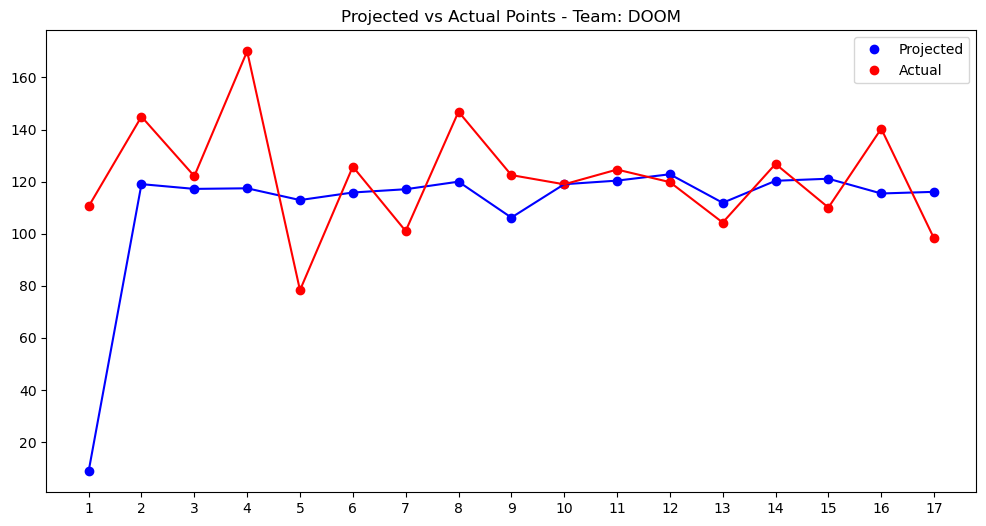

In [34]:
# create the plot
plt.figure(figsize=(12, 6))
plt.plot(plot_data['Week'], plot_data['Projected'], 'bo', label='Projected')
plt.plot(plot_data['Week'], plot_data['Actual'], 'ro', label='Actual')
plt.plot(plot_data['Week'], plot_data['Projected'], 'b-')
plt.plot(plot_data['Week'], plot_data['Actual'], 'r-')
# add a legend and display plot
plt.title('Projected vs Actual Points - Team: DOOM')
plt.legend()
plt.xticks(plot_data['Week'])
plt.show()

### Create a function to create a graph for each team

In [35]:
# create a function to do it for each team
# this will only work with bench players filtered out
def plot_team(df, team_abbrev):
  # filter down and select only the one teams starters 
  df2 = df[df['Team'] == team_abbrev]
 
  # Select the Week and value columns from the groupby object
  plot_data = df2[['Week','Projected','Actual']].groupby(['Week']).sum().reset_index()
  # Set the figure size and create the plot
  plt.figure(figsize=(12, 6))
  plt.plot(plot_data['Week'], plot_data['Projected'], 'bo', label='Projected')
  plt.plot(plot_data['Week'], plot_data['Actual'], 'ro', label='Actual')
  plt.plot(plot_data['Week'], plot_data['Projected'], 'b-')
  plt.plot(plot_data['Week'], plot_data['Actual'], 'r-')
  # Add a legend and show the plot
  plt.title(team_abbrev +' Projected vs. Actual Points')
  plt.legend()
  plt.xticks(plot_data['Week'])
  plt.show()

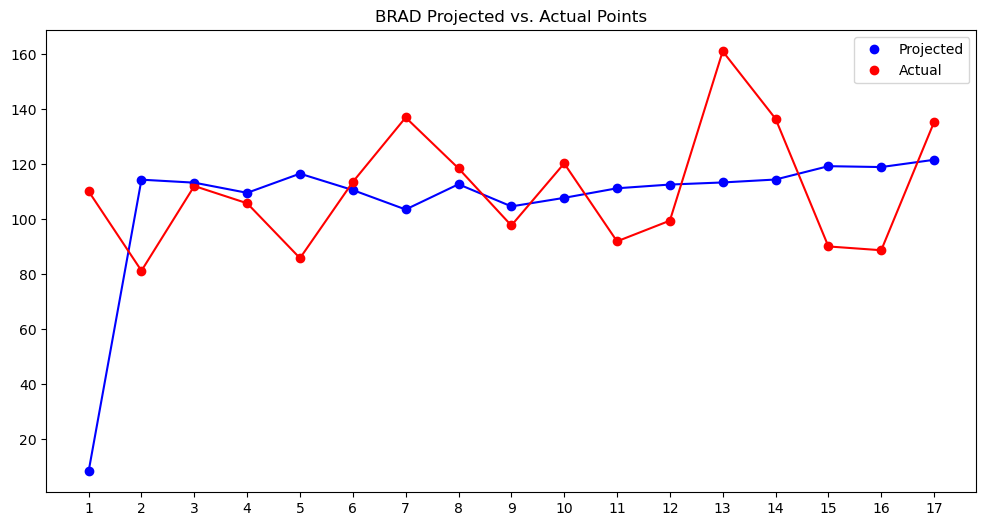

In [36]:
# testing for other team
plot_team(starters_df, 'BRAD')

## Quantify the Difference in Projections & Actual Scores

In [46]:
# create a function to get the difference of projected scores and actual scores
def calc_difference(df):
  return df['Projected'].sum() - df['Actual'].sum()

In [47]:
# use the starters df and groupby team and apply the function
team_df = starters_df.groupby(['Team']).apply(calc_difference)

TypeError: unsupported operand type(s) for +: 'float' and 'tuple'